# New Orleans Crime Stats for 2021
---
## Starter Code to Import Libraries and Load Crime Statistics

The dataset is for all of the Police Reports filed by NOPD officers including incident and supplemental reports containing the item number, location, disposition, signal, charges, offender race, offender gender, offender age, victim age, victim gender, and victim race for the year 2021.


In [2]:
# Dependencies and Setup
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the csv into a Pandas Data Frame
crime_2021 = pd.read_csv("Resources/police2021.csv")

# Examine the data frame
crime_2021.head()

,Item_Number,Year,District,Location,Disposition,Signal_Type,Signal_Description,Occurred_Date_Time,Charge_Code,Charge_Description,...,Offender_Gender,Offender_Age,Victim_Number,PersonType,Victim_Race,Victim_Gender,Victim_Age,Victim_Fatal_Status,Hate Crime,Report Type
0,K-05335-21,2021,2,005XX Jena St,OPEN,67,THEFT,11/3/21 14:21,14 67,THEFT,...,FEMALE,NaN,1.0,VICTIM,WHITE,MALE,34.0,Non-fatal,NaN,Incident Report
1,K-05335-21,2021,2,005XX Jena St,OPEN,67,THEFT,11/3/21 14:21,14 67,THEFT,...,MALE,NaN,1.0,VICTIM,WHITE,MALE,34.0,Non-fatal,NaN,Incident Report
2,K-05372-21,2021,4,014XX Sumner St,OPEN,62C,SIMPLE BURGLARY (VEHICLE),11/5/21 0:30,14 62,SIMPLE BURGLARY,...,UNKNOWN,NaN,1.0,VICTIM,BLACK,FEMALE,34.0,Non-fatal,NaN,Incident Report
3,J-33817-21,2021,8,008XX Canal St,CLOSED,103F,DISTURBANCE (FIGHT),10/28/21 2:25,NaN,NaN,...,MALE,24.0,1.0,VICTIM,BLACK,MALE,24.0,Non-fatal,NaN,Incident Report
4,J-33817-21,2021,8,008XX Canal St,CLOSED,103F,DISTURBANCE (FIGHT),10/28/21 2:25,54 403,DISTURBING THE PEACE,...,MALE,24.0,2.0,VICTIM,BLACK,MALE,30.0,Non-fatal,NaN,Incident Report


In [4]:
# Examine the data types within the dataset
crime_2021.dtypes

Item_Number             object
Year                     int64
District                 int64
Location                object
Disposition             object
Signal_Type             object
Signal_Description      object
Occurred_Date_Time      object
Charge_Code             object
Charge_Description      object
Offender_Number        float64
OffenderID             float64
OffenderStatus          object
Offender_Race           object
Offender_Gender         object
Offender_Age           float64
Victim_Number          float64
PersonType              object
Victim_Race             object
Victim_Gender           object
Victim_Age             float64
Victim_Fatal_Status     object
Hate Crime              object
Report Type             object
dtype: object

In [5]:
len(crime_2021.index)

100518

In [6]:
# Convert Occurred_Date_Time from integer to date time.
crime_2021['Occurred_Date_Time'] = pd.to_datetime(crime_2021['Occurred_Date_Time'], utc=True)
crime_2021['Occurred_Date_Time'].dt.date

0         2021-11-03
1         2021-11-03
2         2021-11-05
3         2021-10-28
4         2021-10-28
             ...    
100513    2021-09-15
100514    2021-08-28
100515    2021-09-11
100516    2021-09-09
100517    2021-09-15
Name: Occurred_Date_Time, Length: 100518, dtype: object

In [7]:
# This code replaces the date/time in Occurred_Date_Time column with only the date.
crime_2021["Occurred_Date_Time"] = crime_2021["Occurred_Date_Time"].dt.date
print(crime_2021)

       Item_Number  Year  District                    Location Disposition  \
0       K-05335-21  2021         2               005XX Jena St        OPEN   
1       K-05335-21  2021         2               005XX Jena St        OPEN   
2       K-05372-21  2021         4             014XX Sumner St        OPEN   
3       J-33817-21  2021         8              008XX Canal St      CLOSED   
4       J-33817-21  2021         8              008XX Canal St      CLOSED   
...            ...   ...       ...                         ...         ...   
100513  I-16780-21  2021         7  072XX Chef Menteur Hw #I25        OPEN   
100514  H-34254-21  2021         8       008XX Gravier St #807        OPEN   
100515  U-00022-21  2021         5       005XX Spain St #70117        OPEN   
100516  I-16868-21  2021         5               021XX Arts St        OPEN   
100517  I-16874-21  2021         5       054XX Saint Claude Av        OPEN   

       Signal_Type         Signal_Description Occurred_Date_Tim

In [8]:
# This views the data and conducts column counts.
crime_2021.count()

Item_Number            100518
Year                   100518
District               100518
Location               100518
Disposition            100518
Signal_Type            100518
Signal_Description     100518
Occurred_Date_Time     100518
Charge_Code             46955
Charge_Description      46955
Offender_Number         60646
OffenderID              60646
OffenderStatus          17865
Offender_Race           57961
Offender_Gender         57700
Offender_Age            24730
Victim_Number           99036
PersonType              99036
Victim_Race             87202
Victim_Gender           87256
Victim_Age              80586
Victim_Fatal_Status    100518
Hate Crime                 48
Report Type            100518
dtype: int64

In [9]:
# Drop the duplicates and keep the first value, use inplace True
deduped_crime = crime_2021.drop_duplicates(subset=["Item_Number"], keep="first", inplace=False)
#deduped_crime = crime_2021
deduped_crime

,Item_Number,Year,District,Location,Disposition,Signal_Type,Signal_Description,Occurred_Date_Time,Charge_Code,Charge_Description,...,Offender_Gender,Offender_Age,Victim_Number,PersonType,Victim_Race,Victim_Gender,Victim_Age,Victim_Fatal_Status,Hate Crime,Report Type
0,K-05335-21,2021,2,005XX Jena St,OPEN,67,THEFT,2021-11-03,14 67,THEFT,...,FEMALE,NaN,1.0,VICTIM,WHITE,MALE,34.0,Non-fatal,NaN,Incident Report
2,K-05372-21,2021,4,014XX Sumner St,OPEN,62C,SIMPLE BURGLARY (VEHICLE),2021-11-05,14 62,SIMPLE BURGLARY,...,UNKNOWN,NaN,1.0,VICTIM,BLACK,FEMALE,34.0,Non-fatal,NaN,Incident Report
3,J-33817-21,2021,8,008XX Canal St,CLOSED,103F,DISTURBANCE (FIGHT),2021-10-28,NaN,NaN,...,MALE,24.0,1.0,VICTIM,BLACK,MALE,24.0,Non-fatal,NaN,Incident Report
7,K-05410-21,2021,1,026XX Gravier St,OPEN,62C,SIMPLE BURGLARY (VEHICLE),2021-11-04,14 62,SIMPLE BURGLARY,...,UNKNOWN,NaN,1.0,VICTIM,BLACK,MALE,37.0,Non-fatal,NaN,Incident Report
8,K-05362-21,2021,4,014XX Sumner St,OPEN,62C,SIMPLE BURGLARY (VEHICLE),2021-11-05,14 62,SIMPLE BURGLARY,...,UNKNOWN,NaN,1.0,VICTIM,BLACK,FEMALE,27.0,Non-fatal,NaN,Incident Report
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100511,I-16780-21,2021,7,072XX Chef Menteur Hw #I25,OPEN,29U,UNCLASSIFIED DEATH,2021-09-15,NaN,NaN,...,NaN,NaN,1.0,NON-VICTIM,BLACK,MALE,59.0,Non-fatal,NaN,Incident Report
100514,H-34254-21,2021,8,008XX Gravier St #807,OPEN,21,MISCELLANEOUS INCIDENT,2021-08-28,NaN,NaN,...,NaN,NaN,1.0,REPORTING PERSON,BLACK,FEMALE,29.0,Non-fatal,NaN,Incident Report
100515,U-00022-21,2021,5,005XX Spain St #70117,OPEN,67B,BICYCLE THEFT,2021-09-11,14 67,THEFT,...,UNKNOWN,NaN,1.0,VICTIM,WHITE,MALE,38.0,Non-fatal,NaN,Incident Report
100516,I-16868-21,2021,5,021XX Arts St,OPEN,67A,AUTO THEFT,2021-09-09,14 67.26,THEFT OF A MOTOR VEHICLE,...,UNKNOWN,NaN,1.0,VICTIM,BLACK,FEMALE,40.0,Non-fatal,NaN,Incident Report


In [10]:
# This drops duplicates from Item_Number, then stores the changes.
#crime_2021.drop_duplicates(keep=False, ignore_index=True, inplace=True)
#deduped_crime = crime_2021
deduped_crime.count()

Item_Number            57992
Year                   57992
District               57992
Location               57992
Disposition            57992
Signal_Type            57992
Signal_Description     57992
Occurred_Date_Time     57992
Charge_Code            30475
Charge_Description     30475
Offender_Number        32119
OffenderID             32119
OffenderStatus          8516
Offender_Race          30479
Offender_Gender        30272
Offender_Age           12140
Victim_Number          56511
PersonType             56511
Victim_Race            49734
Victim_Gender          49762
Victim_Age             46632
Victim_Fatal_Status    57992
Hate Crime                13
Report Type            57992
dtype: int64

In [11]:
# Remove Miscellaneous Incident from the Signal_Description column
clean_signal =deduped_crime.loc[~deduped_crime["Signal_Description"].str.contains("MISCELLANEOUS INCIDENT")]
clean_signal.head()

,Item_Number,Year,District,Location,Disposition,Signal_Type,Signal_Description,Occurred_Date_Time,Charge_Code,Charge_Description,...,Offender_Gender,Offender_Age,Victim_Number,PersonType,Victim_Race,Victim_Gender,Victim_Age,Victim_Fatal_Status,Hate Crime,Report Type
0,K-05335-21,2021,2,005XX Jena St,OPEN,67,THEFT,2021-11-03,14 67,THEFT,...,FEMALE,NaN,1.0,VICTIM,WHITE,MALE,34.0,Non-fatal,NaN,Incident Report
2,K-05372-21,2021,4,014XX Sumner St,OPEN,62C,SIMPLE BURGLARY (VEHICLE),2021-11-05,14 62,SIMPLE BURGLARY,...,UNKNOWN,NaN,1.0,VICTIM,BLACK,FEMALE,34.0,Non-fatal,NaN,Incident Report
3,J-33817-21,2021,8,008XX Canal St,CLOSED,103F,DISTURBANCE (FIGHT),2021-10-28,NaN,NaN,...,MALE,24.0,1.0,VICTIM,BLACK,MALE,24.0,Non-fatal,NaN,Incident Report
7,K-05410-21,2021,1,026XX Gravier St,OPEN,62C,SIMPLE BURGLARY (VEHICLE),2021-11-04,14 62,SIMPLE BURGLARY,...,UNKNOWN,NaN,1.0,VICTIM,BLACK,MALE,37.0,Non-fatal,NaN,Incident Report
8,K-05362-21,2021,4,014XX Sumner St,OPEN,62C,SIMPLE BURGLARY (VEHICLE),2021-11-05,14 62,SIMPLE BURGLARY,...,UNKNOWN,NaN,1.0,VICTIM,BLACK,FEMALE,27.0,Non-fatal,NaN,Incident Report


In [12]:
# Select columns of interest from the DataFrame and save the new DataFrame
# Selected: "Item_Number", "Year", "District", "Signal_Description", "Occurred_Date_Time", & "Offender_Gender". 

reduced_crime_df = clean_signal[["Item_Number", "Year", "District", "Signal_Type","Signal_Description", "Occurred_Date_Time", 
                       "Offender_Gender", "Victim_Fatal_Status"]]
reduced_crime_df.head()

,Item_Number,Year,District,Signal_Type,Signal_Description,Occurred_Date_Time,Offender_Gender,Victim_Fatal_Status
0,K-05335-21,2021,2,67,THEFT,2021-11-03,FEMALE,Non-fatal
2,K-05372-21,2021,4,62C,SIMPLE BURGLARY (VEHICLE),2021-11-05,UNKNOWN,Non-fatal
3,J-33817-21,2021,8,103F,DISTURBANCE (FIGHT),2021-10-28,MALE,Non-fatal
7,K-05410-21,2021,1,62C,SIMPLE BURGLARY (VEHICLE),2021-11-04,UNKNOWN,Non-fatal
8,K-05362-21,2021,4,62C,SIMPLE BURGLARY (VEHICLE),2021-11-05,UNKNOWN,Non-fatal


In [13]:
# Count how many incidents occurred
crime_type = reduced_crime_df ["Signal_Description"].value_counts()
crime_type

DISTURBANCE (DOMESTIC)           7925
SIMPLE BURGLARY (VEHICLE)        4974
AUTO THEFT                       3041
SIMPLE BATTERY (DOMESTIC)        2959
DISTURBANCE                      2880
                                 ... 
TRAFFIC ATTACHMENT                  1
SIMPLE ESCAPE                       1
SIMPLE RAPE (MALE VICTIM)           1
ATTEMPTED AGGRAVATED BURGLARY       1
ABANDONED BOAT                      1
Name: Signal_Description, Length: 151, dtype: int64

In [14]:
reduced_crime_df.groupby("Signal_Description").count()

,Item_Number,Year,District,Signal_Type,Occurred_Date_Time,Offender_Gender,Victim_Fatal_Status
Signal_Description,,,,,,,
ABANDONED BOAT,1,1,1,1,1,0,1
ABANDONED VEHICLE,79,79,79,79,79,1,79
AGGRAVATED ARSON,6,6,6,6,6,5,6
AGGRAVATED ASSAULT,776,776,776,776,776,711,776
AGGRAVATED ASSAULT (DOMESTIC),389,389,389,389,389,368,389
...,...,...,...,...,...,...,...
UNARMED CARJACKING,63,63,63,63,63,46,63
UNAUTHORIZED USE OF MOVABLES,221,221,221,221,221,182,221
UNCLASSIFIED DEATH,297,297,297,297,297,1,297


In [15]:
# Convert the Signal_Description into a DataFrame and retrieve the top ten offenses.
crime_specific_df = pd.DataFrame(crime_type)
crime_filtered = crime_specific_df.nlargest(10, columns=["Signal_Description"], keep= "all")
# Export the City_Data into a csv
crime_filtered.to_csv("output_data/2018_crime_10.csv")
crime_filtered

,Signal_Description
DISTURBANCE (DOMESTIC),7925
SIMPLE BURGLARY (VEHICLE),4974
AUTO THEFT,3041
SIMPLE BATTERY (DOMESTIC),2959
DISTURBANCE,2880
SIMPLE CRIMINAL DAMAGE,2633
THEFT,2605
LOST PROPERTY,1791
SIMPLE BATTERY,1697
THEFT BY FRAUD,1636


In [16]:
# Group by Signal_Description
reduced_crime_df.count_column=reduced_crime_df.groupby(["Signal_Description"]).Signal_Description.transform('count')
reduced_crime_df.head()

,Item_Number,Year,District,Signal_Type,Signal_Description,Occurred_Date_Time,Offender_Gender,Victim_Fatal_Status
0,K-05335-21,2021,2,67,THEFT,2021-11-03,FEMALE,Non-fatal
2,K-05372-21,2021,4,62C,SIMPLE BURGLARY (VEHICLE),2021-11-05,UNKNOWN,Non-fatal
3,J-33817-21,2021,8,103F,DISTURBANCE (FIGHT),2021-10-28,MALE,Non-fatal
7,K-05410-21,2021,1,62C,SIMPLE BURGLARY (VEHICLE),2021-11-04,UNKNOWN,Non-fatal
8,K-05362-21,2021,4,62C,SIMPLE BURGLARY (VEHICLE),2021-11-05,UNKNOWN,Non-fatal


In [17]:
top_10_crimes_21 = (reduced_crime_df["Signal_Description"].value_counts())[:10]
top_10_crimes_21

DISTURBANCE (DOMESTIC)       7925
SIMPLE BURGLARY (VEHICLE)    4974
AUTO THEFT                   3041
SIMPLE BATTERY (DOMESTIC)    2959
DISTURBANCE                  2880
SIMPLE CRIMINAL DAMAGE       2633
THEFT                        2605
LOST PROPERTY                1791
SIMPLE BATTERY               1697
THEFT BY FRAUD               1636
Name: Signal_Description, dtype: int64

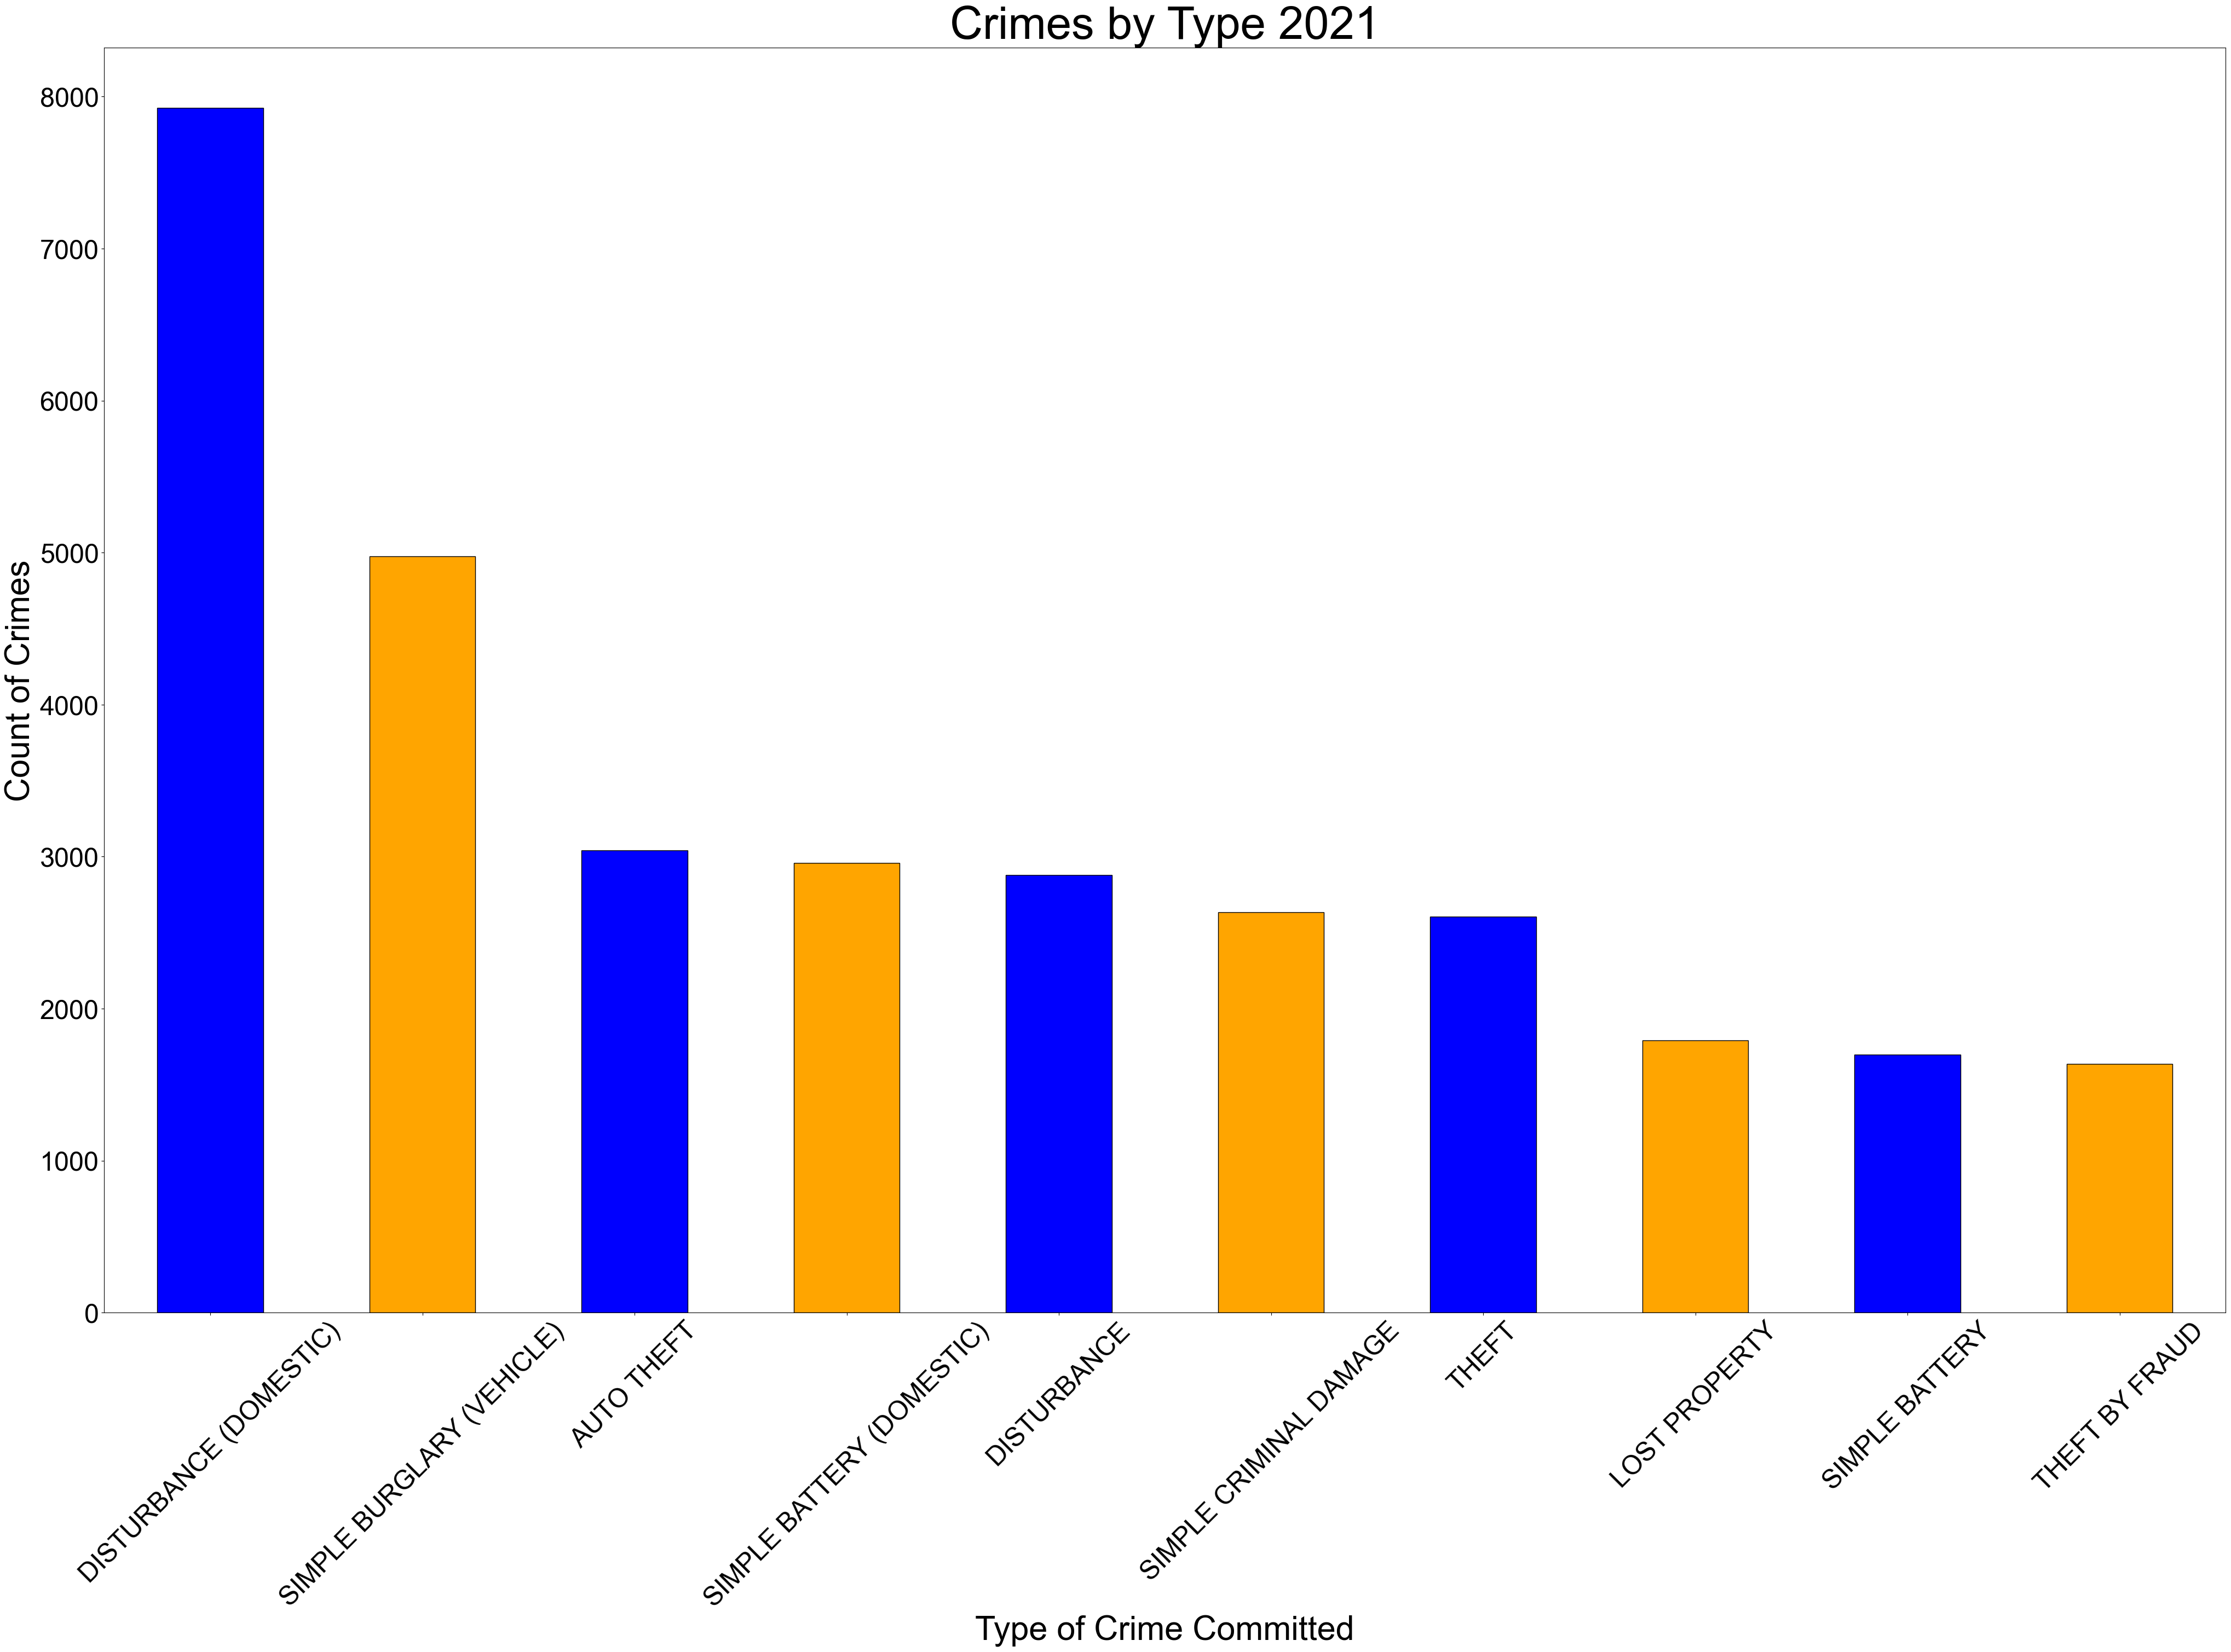

In [ ]:
# Create a bar graph representing Signal_Description top ten with Counts
top_10_crimes_21.plot(kind='bar', edgecolor='black', rot=45, fontsize=35, color=["blue","orange"])
sns.set(style = 'darkgrid')
#add axis labels
plt.title("Crimes by Type 2021", fontsize=60)
plt.xlabel('Type of Crime Committed', fontsize=44)
plt.ylabel('Count of Crimes', fontsize=44)
plt.gcf().set_size_inches(50,30)
# Save the figure
plt.savefig("output_data/2021_crime_type.png")

In [19]:
reduced_crime_df.groupby("Signal_Description").count()

,Item_Number,Year,District,Signal_Type,Occurred_Date_Time,Offender_Gender,Victim_Fatal_Status
Signal_Description,,,,,,,
ABANDONED BOAT,1,1,1,1,1,0,1
ABANDONED VEHICLE,79,79,79,79,79,1,79
AGGRAVATED ARSON,6,6,6,6,6,5,6
AGGRAVATED ASSAULT,776,776,776,776,776,711,776
AGGRAVATED ASSAULT (DOMESTIC),389,389,389,389,389,368,389
...,...,...,...,...,...,...,...
UNARMED CARJACKING,63,63,63,63,63,46,63
UNAUTHORIZED USE OF MOVABLES,221,221,221,221,221,182,221
UNCLASSIFIED DEATH,297,297,297,297,297,1,297


In [20]:
district_crimes_21 = (reduced_crime_df["District"].value_counts())[:10]
district_crimes_21

7    9436
5    7317
8    6366
6    6280
3    6039
1    5632
4    5462
2    5065
Name: District, dtype: int64

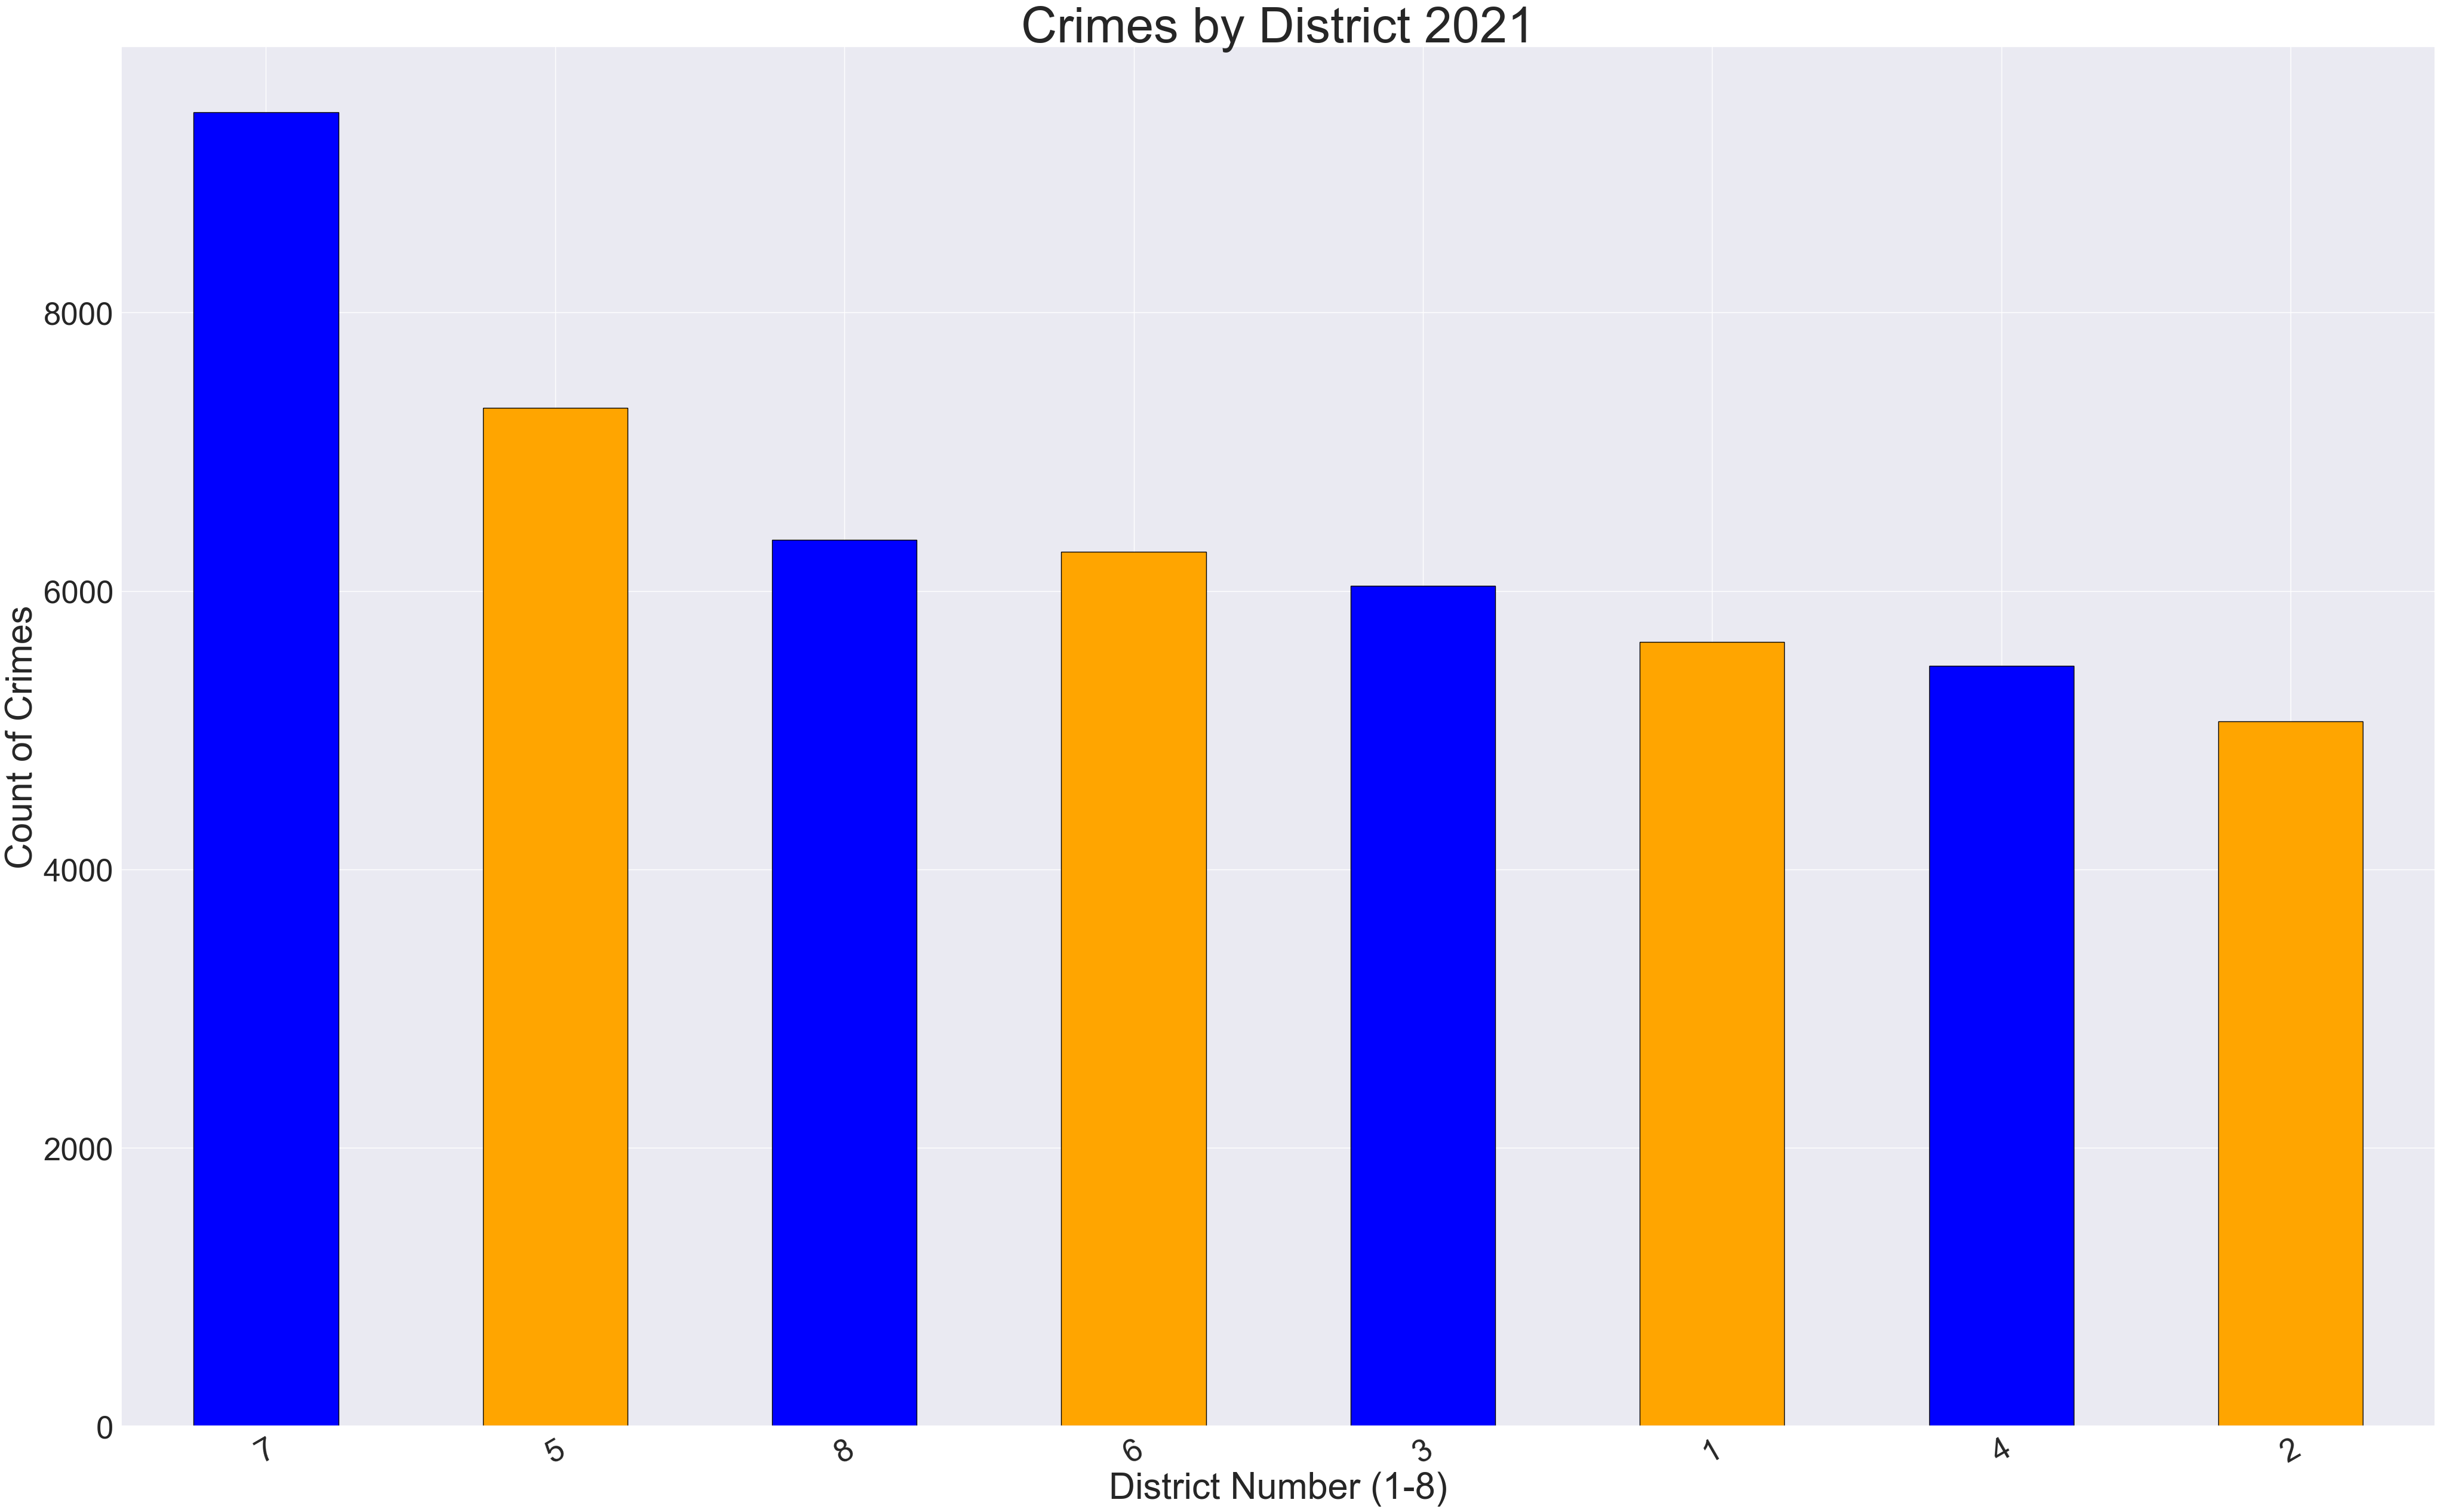

In [21]:
# Create a bar graph representing Signal_Description top ten with Counts
district_crimes_21.plot(kind='bar', edgecolor='black', rot=30, fontsize=38, color=["blue","orange"])
sns.set(style = 'darkgrid')

#add axis labels
plt.title("Crimes by District 2021", fontsize=60)
plt.xlabel('District Number (1-8)', fontsize=44)
plt.ylabel('Count of Crimes', fontsize=44)
plt.gcf().set_size_inches(50,30)
# Save the figure
plt.savefig("output_data/2021_district.png")

In [22]:
#crime_month = (reduced_crime_df["Occurred_Date_Time"].value_counts())[:10]
#crime_month

In [23]:
#fatality = reduced_crime_df["Victim_Fatal_Status"].value_counts()
#fatality

In [24]:
#reduced_crime_df["Offender_Gender"].value_counts().plot.pie(labels=["Male", "Female"], autopct="%.2f")
#plt.title("2021 Crime by Gender", fontsize=20)
# Save the figure
#plt.savefig("output_data/2021_gender.png")

In [27]:
#data = reduced_crime_df["Offender_Gender"].value_counts()
#data

MALE       13882
UNKNOWN    11979
FEMALE      4011
Name: Offender_Gender, dtype: int64

In [38]:
# Dropping miscellaneous from gender 
data_gender = reduced_crime_df[reduced_crime_df["Offender_Gender"].str.contains("UNKNOWN") == False]
data_gender.head()


,Item_Number,Year,District,Signal_Type,Signal_Description,Occurred_Date_Time,Offender_Gender,Victim_Fatal_Status
0,K-05335-21,2021,2,67,THEFT,2021-11-03,FEMALE,Non-fatal
3,J-33817-21,2021,8,103F,DISTURBANCE (FIGHT),2021-10-28,MALE,Non-fatal
23,I-09461-21,2021,1,37,AGGRAVATED ASSAULT,2021-09-08,MALE,Non-fatal
27,G-28491-21,2021,3,966,DRUG LAW VIOLATION,2021-07-23,MALE,Non-fatal
32,K-05513-21,2021,7,64G,ARMED ROBBERY (GUN),2021-11-05,MALE,Non-fatal


In [39]:
filtered_gender = data_gender["Offender_Gender"].value_counts()
filtered_gender

MALE      13882
FEMALE     4011
Name: Offender_Gender, dtype: int64

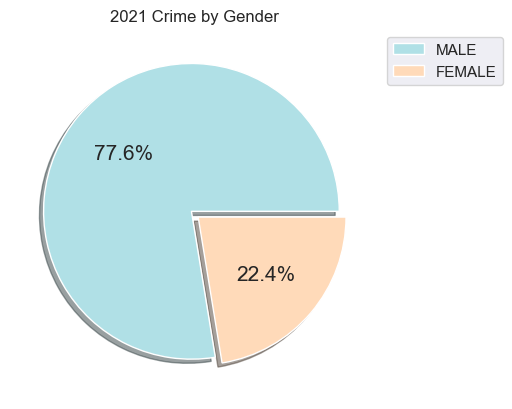

In [44]:
colors = ["#B0E0E6","#FFDAB9", "#B0E0E6","#FFDAB9"]
data = data_gender["Offender_Gender"].value_counts()
ax = data.plot(kind="pie", autopct='%1.1f%%', shadow=True, colors=colors, legend=True, explode=[0.03, 0.03], title="2021 Crime by Gender", fontsize=15, ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig("output_data/2021_gender.png")
plt.show()

In [34]:
#reduced_crime_df.groupby("District")["Signal_Description"].count().sort_values(ascending=False)
#reduced_crime_df.groupby("Signal_Description")["District"].count().sort_values(ascending=True)
#reduced_crime_df.value_counts()